# Contrôle qualité

###### Equipe pédagogique : P. François, M. Genete, C. Toffano-Nioche, E. Jacquemet, G. Le Corguillé, J. Seiler, D. Puthier, T. Denecker et tout le staff

## Le fichier FastQ

Quelque soit le séquenceur ou l'expérience réalisée, nous obtenons des fichiers FastQ.

Tous se présentent de la même façon :
- Fichier texte contenant les lectures
- 1 lecture/read = 4 lignes
- Chaque lecture est définie par une séquence, un identifiant unique et un score

    @QSEQ32.249996 HWUSI-EAS1691:3:1:17036:13000#0/1 PF=0 length=36
    GGGGGTCATCATCATTTGATCTGGGAAAGGCTACTG
    +
    =.+5:<<<<>AA?0A>;A*A################

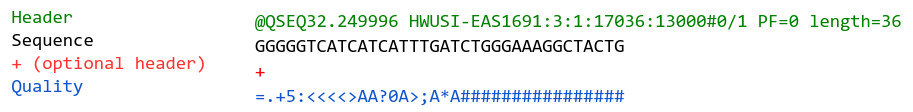

La ligne de header commence toujours par un <code>@</code>.

La ligne de séquence contient le même nombre de caractère que la ligne de qualité mais comment lire cette dernière ?

## Encodage de la qualité

Le score de qualité est encodé au **format ASCII** (American Standard Code for Information Interchange), cela permet qu'une base soit représentée par un caractère unique.

Si nous utilisions des scores qualités directement, il serait impossible de donner la correspondance exacte entre une base et son score.

Par exemple :

    @read1
    ATC
    +
    12523
    
Comment dire si les scores sont de 1, 25 et 23 ou 12, 5 et 23 ?

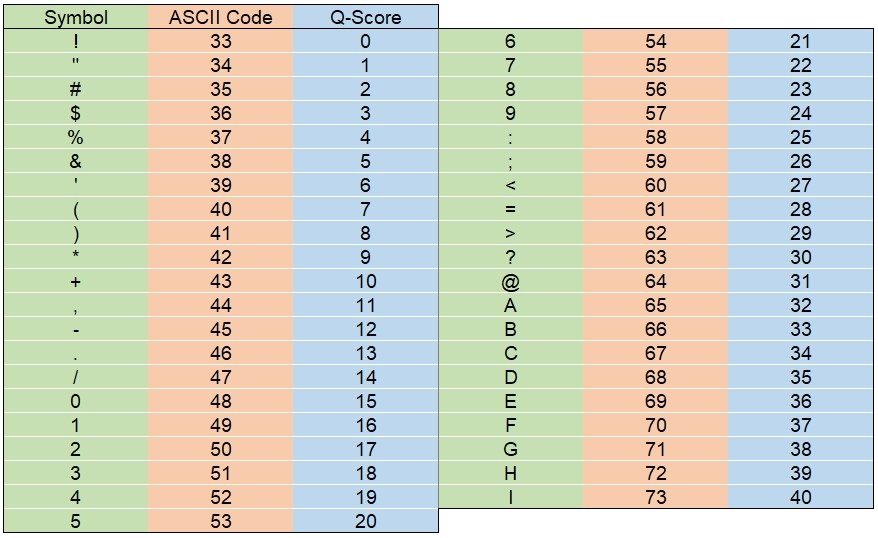

On a donc une correspondance entre chaque symbole et un score qualité, appelé **score Phred**.

Mais comment interpréter ce score ? 

On imagine facilement qu'un score de 40 sera préférable à 0 mais dans quelle mesure ?

Le score Phred peut être converti en probabilité d'erreur, elle même convertible en pourcentage de précision (ou accuracy).

La formule est la suivante :



Où *__Q__* = Le score Phred et *__P__* = La probabilité d'erreur d'identification d'une base.

Voici quelques scores utiles à avoir en tête :
    
| Score de qualité phred | Probabilité d'une identification incorrecte | Précision de l'identification d'une base |
|:---:|:---:|:---:|
| 10 | 1 pour 10 | 90% |
| 20 | 1 pour 100 | 99% |
| 30 | 1 pour 1000 | 99,9% |
| 40 | 1 pour 10000 | 99,99% |

En règle générale, on estime qu'un score doit être supérieur à 20 pour être acceptable.

## L'outil FastQC

Quand nous avons des fichiers avec plus d'un million de lectures, faisant par exemple chacunes 150 paires de bases, cela ferait plus de 150 millions de score qualité à vérifier... Hors de question de le faire à la main, donc.

C'est là que l'outil FastQC nous vient en aide !

Il permet d'obtenir un fichier HTML résumant l'ensemble des informations nécessaires pour estimer si notre run s'est bien passé et si notre échantillon possède des lectures de bonne qualité.

Tentons ensemble d'en saisir le contenu. Vous pouvez cliquer sur ce lien pour visualiser un [rapport complet](https://ifb-elixirfr.github.io/LinuxEBAII/data/siNT_ER_E2_r3_chr21_fastqc.html)

On note tout d'abord que devant chaque section, se trouve un code couleur : 

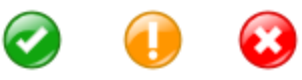

Attention, selon le type de séquençage effectué, cette information n'est pas toujours pertinente.

### _Basic Statistics_ :

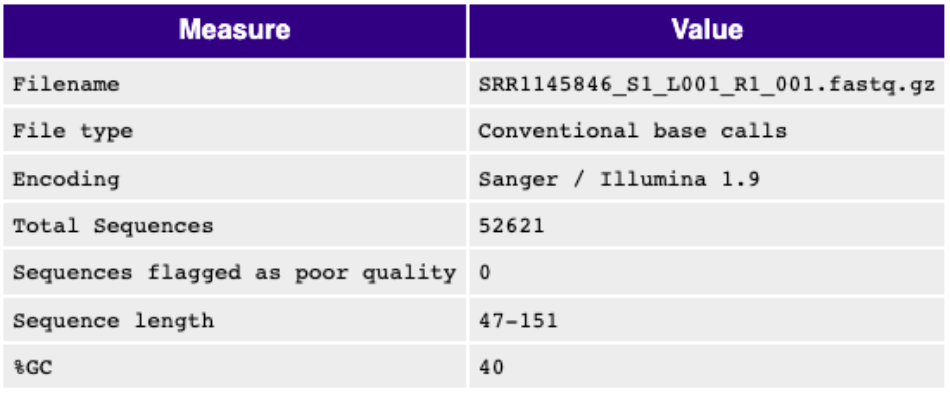

### _Per base Sequence Quality_ :

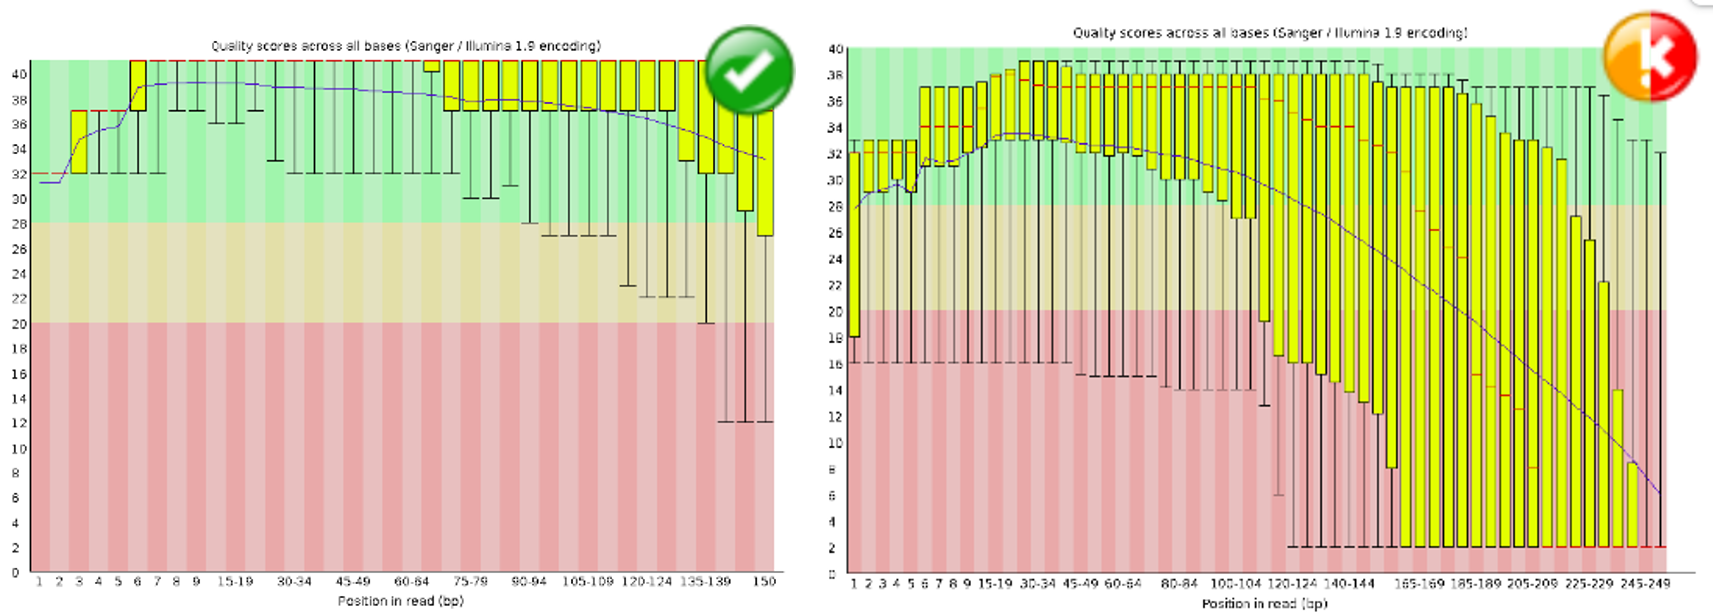

### _Per Tile Sequence Quality_

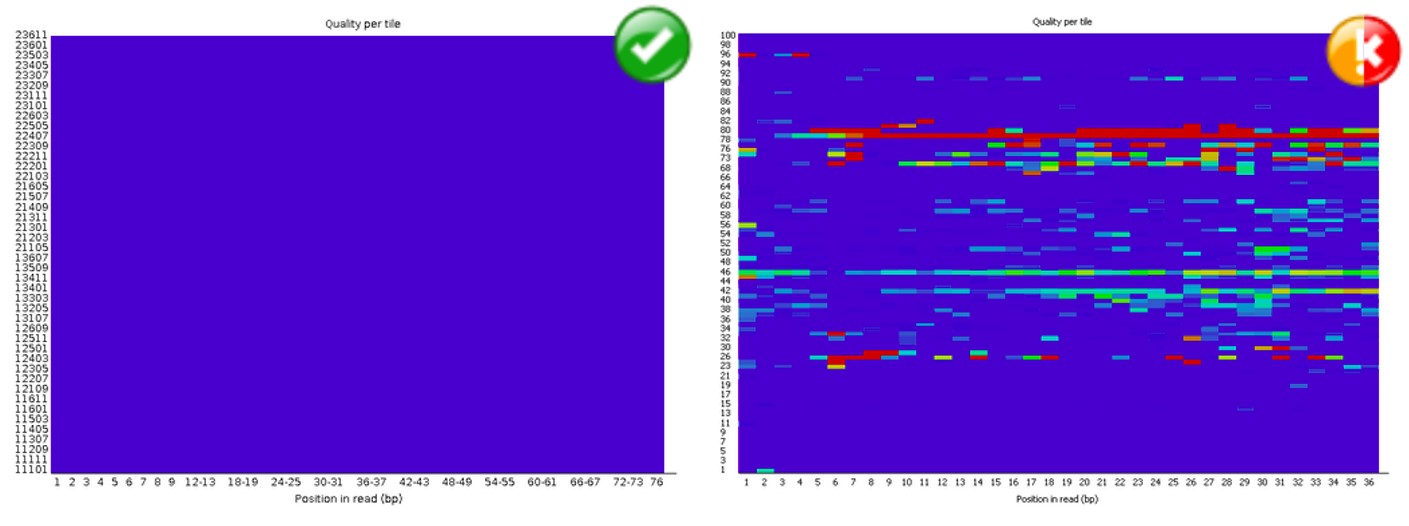

## _Per Sequence Quality Scores_

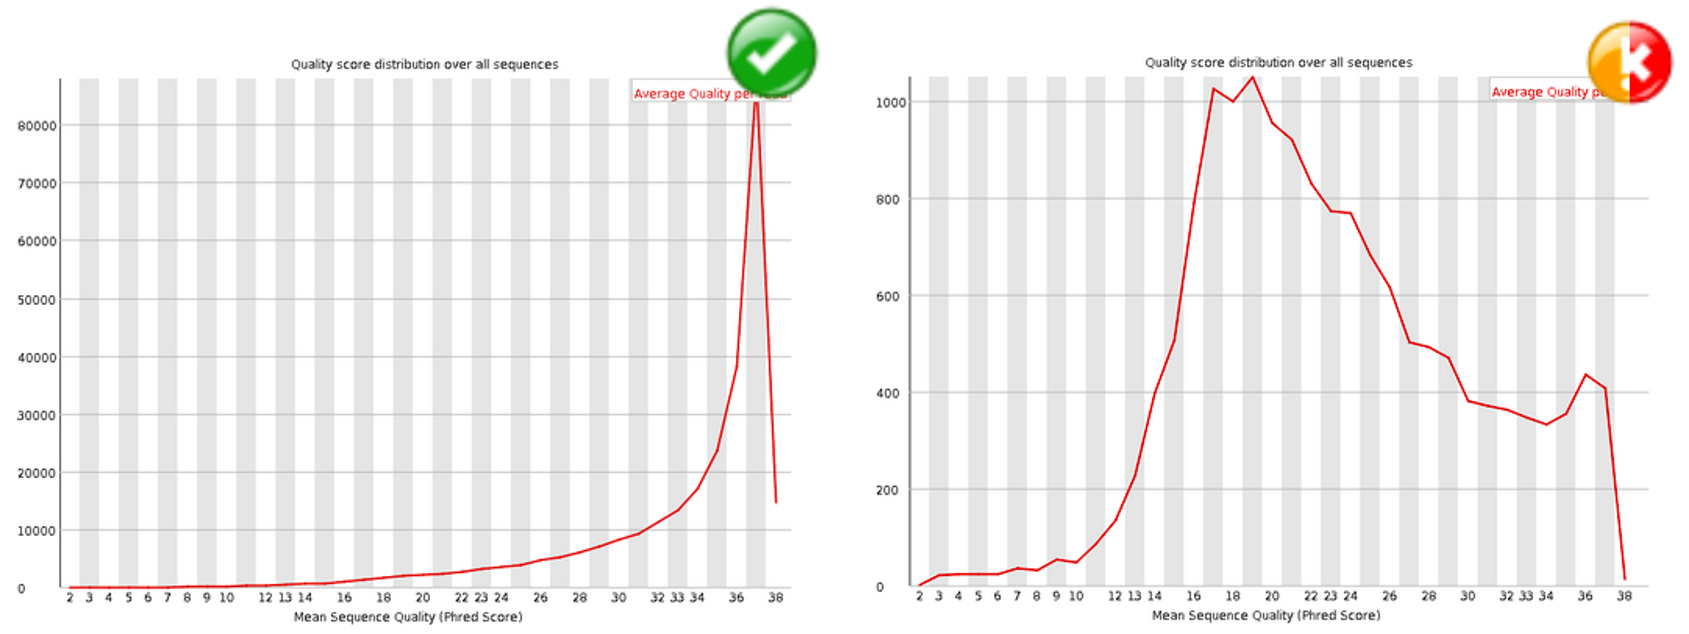

## _Per Base Sequence Content_

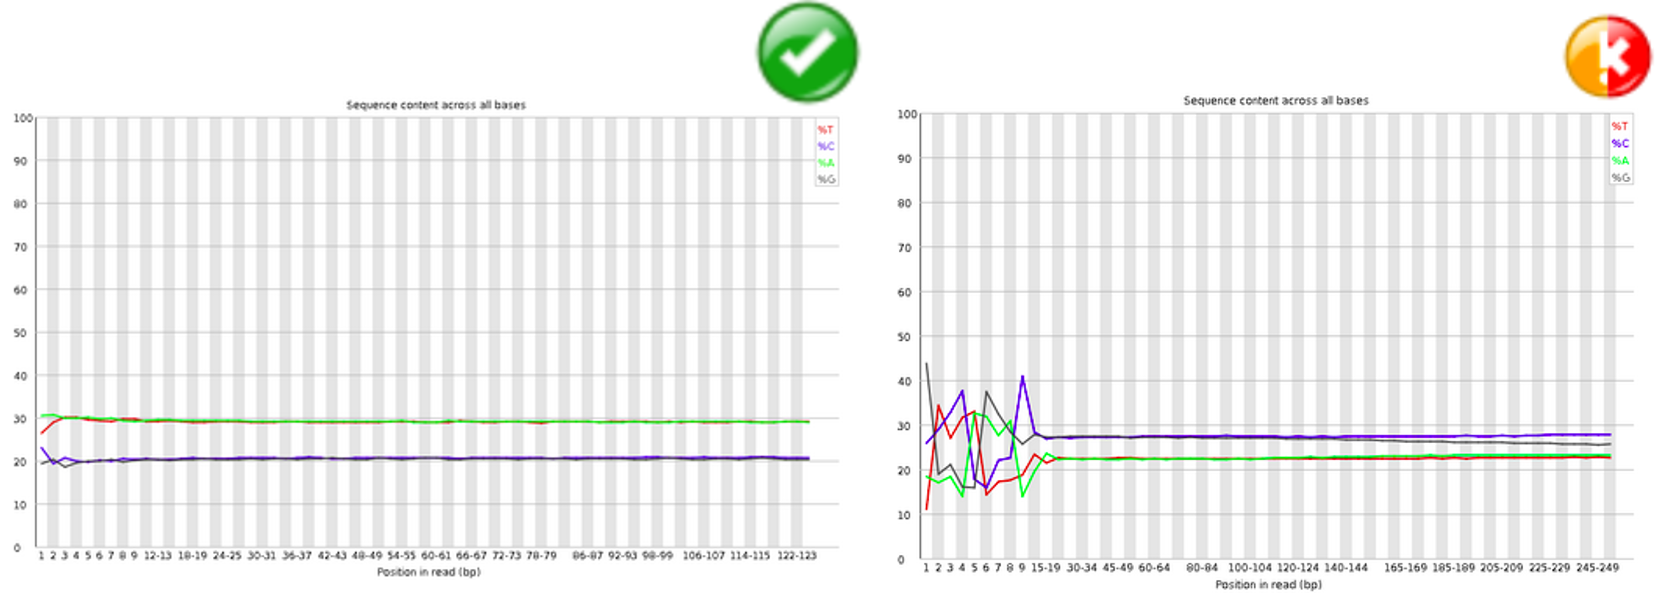

## _Per Sequence GC Content_

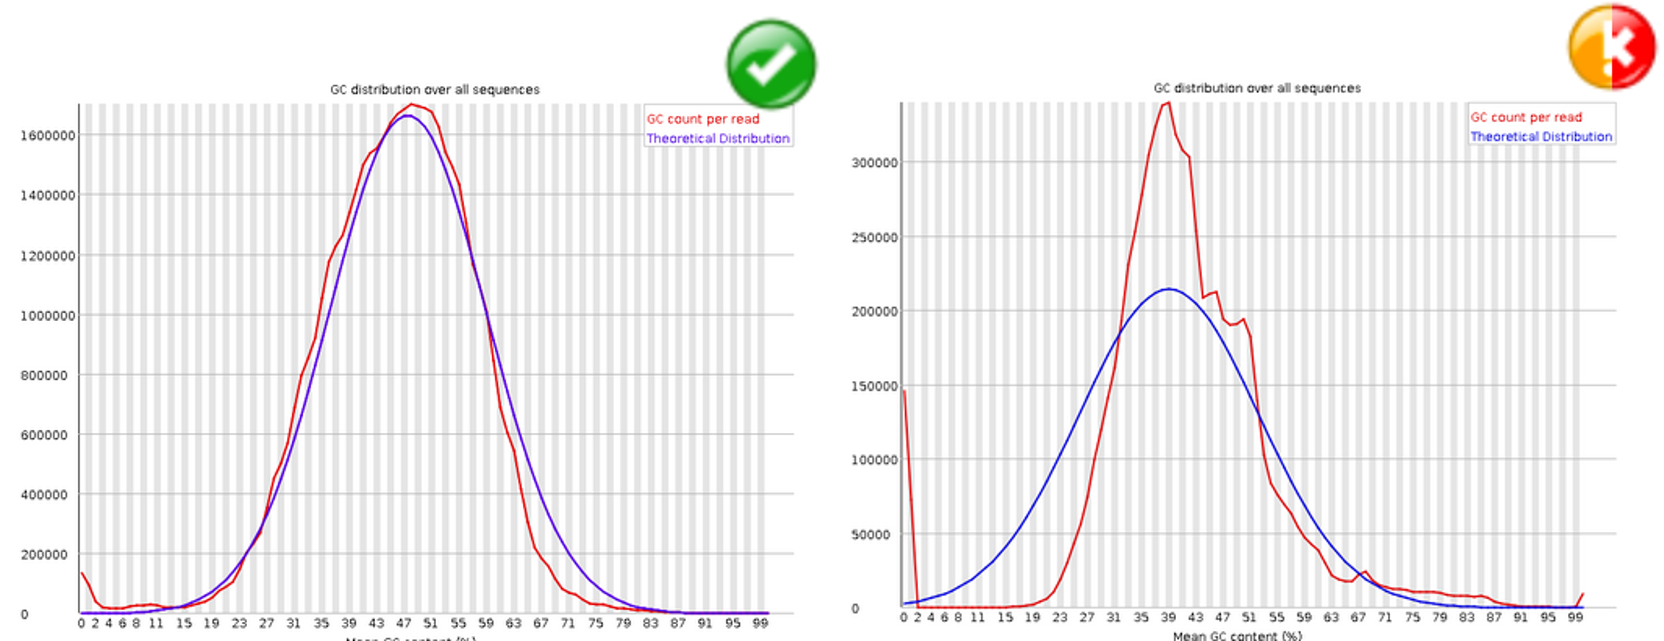

## _Per Base N Content_ 

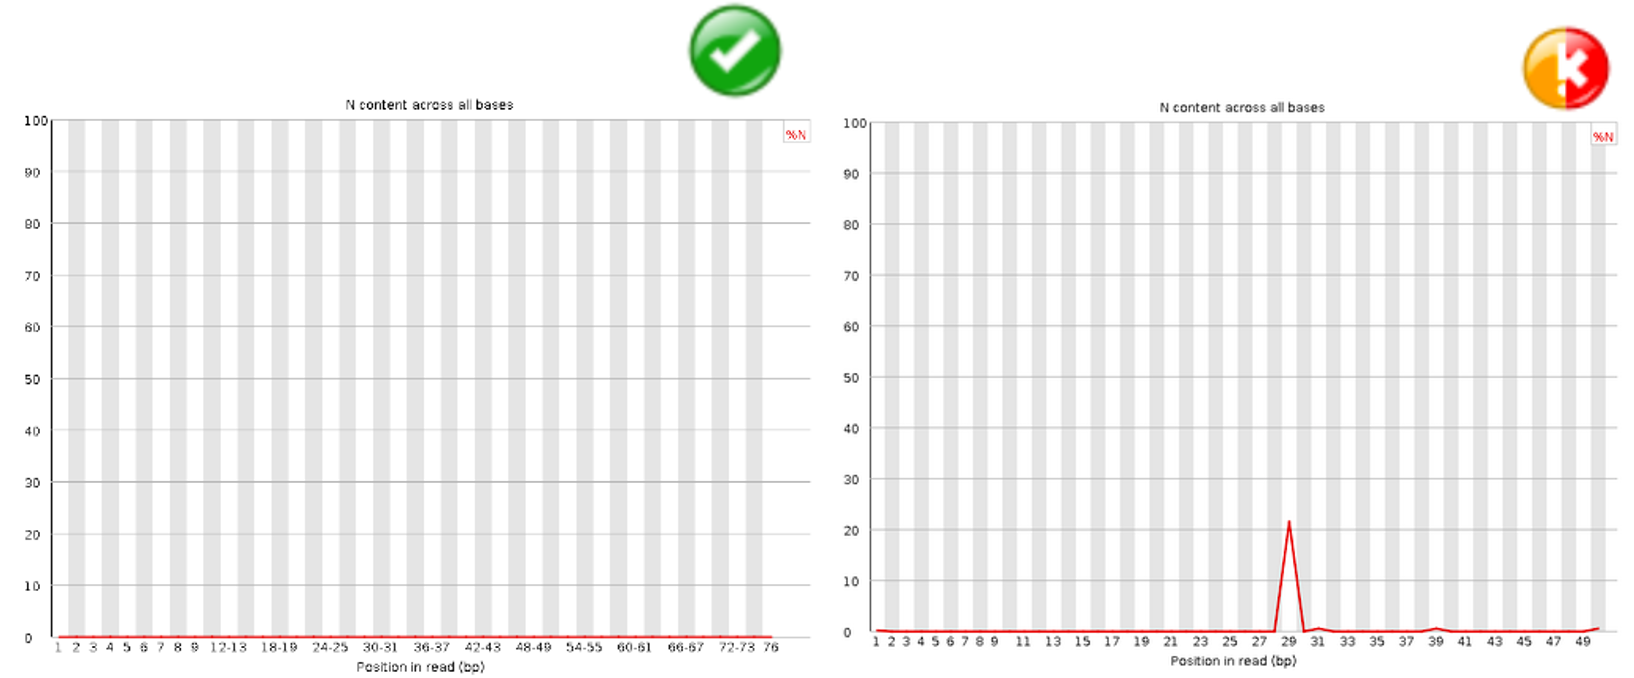

## _Sequence Length Distribution_

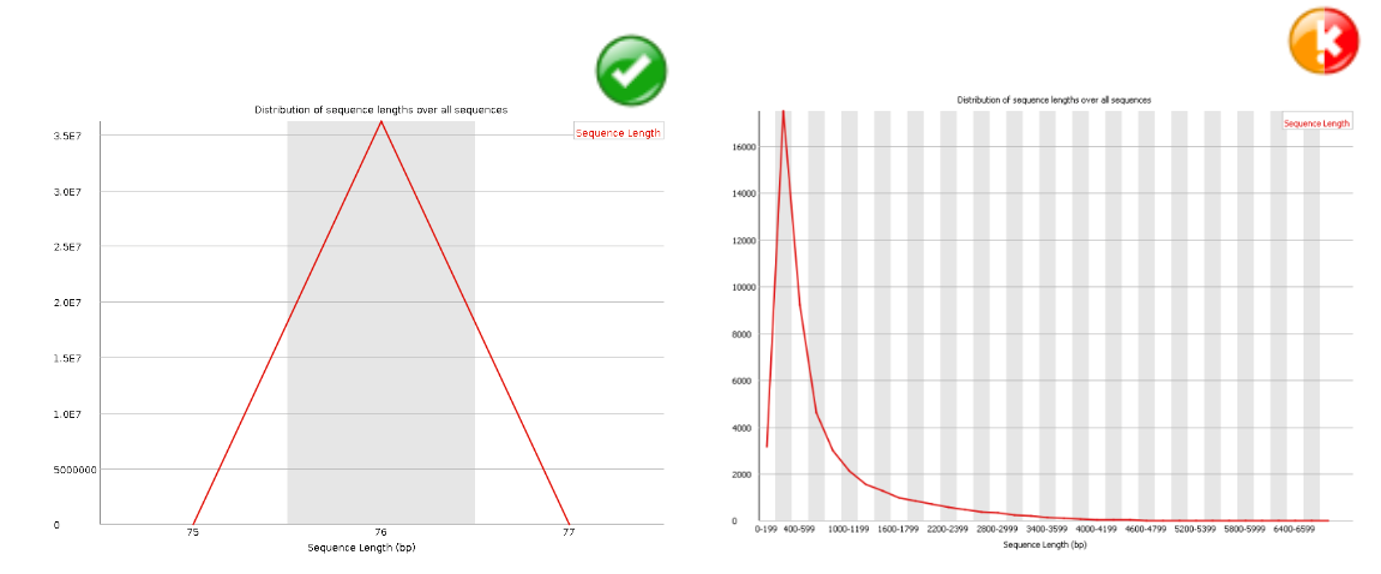

## _Duplicate Sequences_

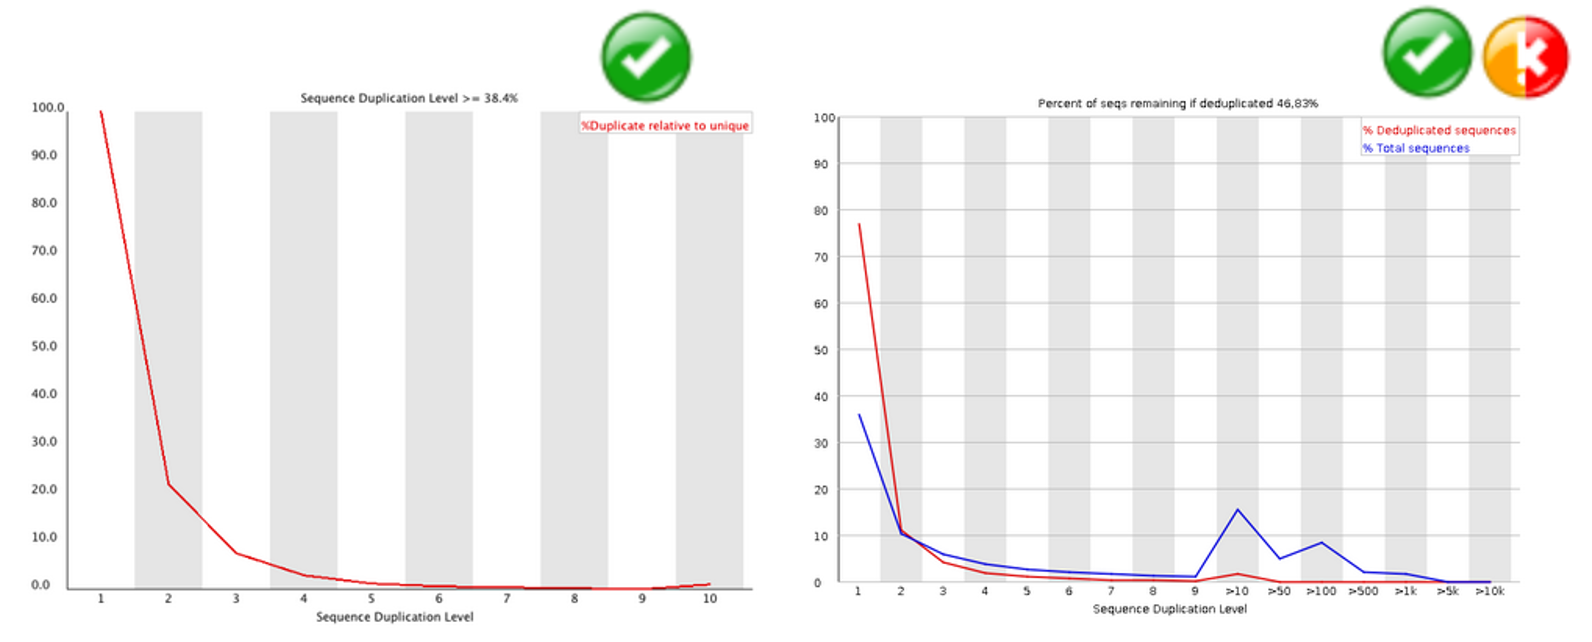

## _Overrepresented Sequences_

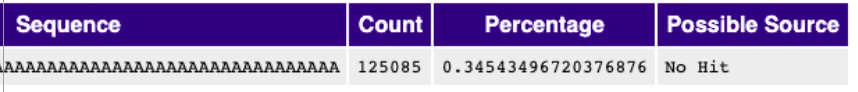

## _Adapter Content_

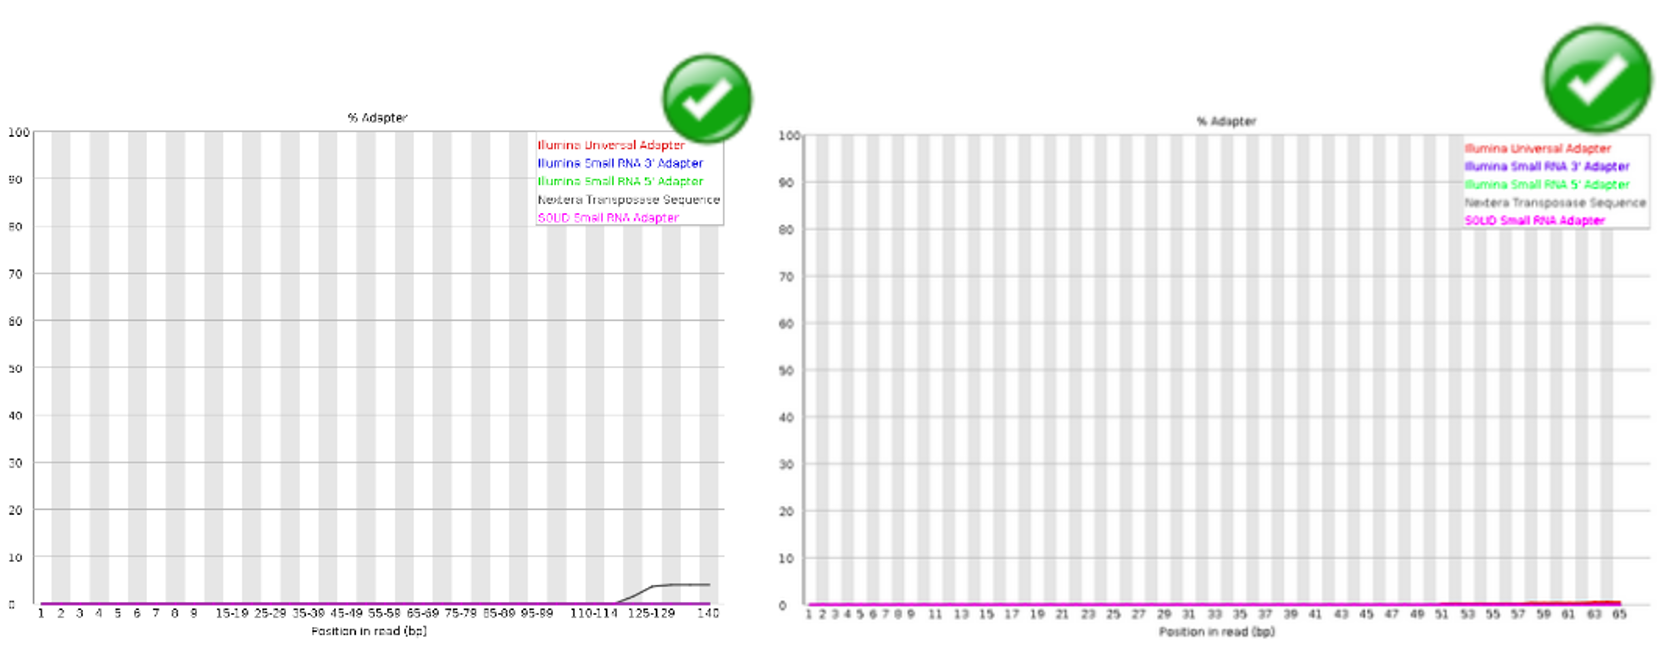